# Automated feature selection

**Reasons to have:**

* Some automatically created features are garbage
* Reduces complexity
* Trains faster
* Improves accuracy
* Reduce overfitting

**Methods:**
1. Filter methods
2. Wrapper Methods
3. Embedded Methods

In [1]:
import numpy as np
import pandas as pd

from IPython.display import Image

## Load data

In [2]:
input_file = '../data/train_feature_sample.csv'
dtypes = {
    'ip': 'uint32',
    'app': 'uint16',
    'device': 'uint16',
    'os': 'uint16',
    'channel': 'uint16',
    'is_attributed': 'uint8'
}

In [3]:
df_train = pd.read_csv(input_file, dtype=dtypes)
X = df_train.drop(columns='click_time').drop(columns='id')
y = X.pop('is_attributed')

X.head()

,ip,app,device,os,channel,"app.isin([1, 2, 3, 4, 5])",COUNT(clicks),PERCENT_TRUE(clicks.is_attributed),NUM_UNIQUE(clicks.ip),NUM_UNIQUE(clicks.device),...,MODE(clicks.channel),COUNT(clicks WHERE is_attributed = True),NUM_UNIQUE(clicks.DAY(click_time)),NUM_UNIQUE(clicks.YEAR(click_time)),NUM_UNIQUE(clicks.MONTH(click_time)),NUM_UNIQUE(clicks.WEEKDAY(click_time)),MODE(clicks.DAY(click_time)),MODE(clicks.YEAR(click_time)),MODE(clicks.MONTH(click_time)),MODE(clicks.WEEKDAY(click_time))
0,87540,12,1,13,497,False,13198,0.000076,9190,4,...,178,1.0,4,1,1,4,8,2017,11,2
1,105560,25,1,17,259,False,804,0.000000,740,2,...,259,0.0,4,1,1,4,7,2017,11,1
2,101424,12,1,19,212,False,13198,0.000076,9190,4,...,178,1.0,4,1,1,4,8,2017,11,2
3,94584,13,1,13,477,False,2422,0.000000,2179,4,...,477,0.0,4,1,1,4,7,2017,11,1
4,68413,12,1,1,178,False,13198,0.000076,9190,4,...,178,1.0,4,1,1,4,8,2017,11,2


# Filter methods

* statistical tests
* independent of machine learning algorithms
* used as a preprocessing step before machine learning 

In [4]:
Image(url= "../img/filter-methods.png", width=600, height=600)

## 1. Common sense

In [5]:
len(X.columns)

25

In [6]:
X.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'app.isin([1, 2, 3, 4, 5])',
       'COUNT(clicks)', 'PERCENT_TRUE(clicks.is_attributed)',
       'NUM_UNIQUE(clicks.ip)', 'NUM_UNIQUE(clicks.device)',
       'NUM_UNIQUE(clicks.os)', 'NUM_UNIQUE(clicks.channel)',
       'MODE(clicks.ip)', 'MODE(clicks.device)', 'MODE(clicks.os)',
       'MODE(clicks.channel)', 'COUNT(clicks WHERE is_attributed = True)',
       'NUM_UNIQUE(clicks.DAY(click_time))',
       'NUM_UNIQUE(clicks.YEAR(click_time))',
       'NUM_UNIQUE(clicks.MONTH(click_time))',
       'NUM_UNIQUE(clicks.WEEKDAY(click_time))',
       'MODE(clicks.DAY(click_time))', 'MODE(clicks.YEAR(click_time))',
       'MODE(clicks.MONTH(click_time))', 'MODE(clicks.WEEKDAY(click_time))'],
      dtype='object')

In [7]:
X_tmp = X.drop(columns='NUM_UNIQUE(clicks.YEAR(click_time))')

## 2. Variance

* Removes features with low variance
* Docs: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold

In [8]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_tmp = sel.fit_transform(X)
len(X_tmp[0])

18

In [9]:
for x in zip(X.columns, sel.variances_):
    print(f"{x[0]}: {x[1]}")

ip: 4876955785.128131
app: 223.2461875056
device: 67426.6751634375
os: 3129.603157841601
channel: 16828.2122903484
app.isin([1, 2, 3, 4, 5]): 0.2224340391
COUNT(clicks): 33877641.63603411
PERCENT_TRUE(clicks.is_attributed): 0.0004597986233921529
NUM_UNIQUE(clicks.ip): 13759700.54983271
NUM_UNIQUE(clicks.device): 26.180141391600003
NUM_UNIQUE(clicks.os): 160.28823221590002
NUM_UNIQUE(clicks.channel): 108.54447279360002
MODE(clicks.ip): 572870825.592151
MODE(clicks.device): 21903.401119039998
MODE(clicks.os): 1225.4590860736007
MODE(clicks.channel): 17338.2946191536
COUNT(clicks WHERE is_attributed = True): 30.824343750000015
NUM_UNIQUE(clicks.DAY(click_time)): 0.028159750000000004
NUM_UNIQUE(clicks.YEAR(click_time)): 0.0
NUM_UNIQUE(clicks.MONTH(click_time)): 0.0
NUM_UNIQUE(clicks.WEEKDAY(click_time)): 0.028159750000000004
MODE(clicks.DAY(click_time)): 0.3609552110999999
MODE(clicks.YEAR(click_time)): 0.0
MODE(clicks.MONTH(click_time)): 0.0
MODE(clicks.WEEKDAY(click_time)): 0.36095521109

# Wrapper methods

* "wraps" machine learning algorithms
* adds or removes features from a subset

**Examples:**

* Forward Selection - starts from no features, adds one by one
* Backward Elimination - starts from all features, removes one by one
* Recursive Feature elimination - optimization algorithm, 

## 1. Recursive feature elimination
* Recursively considers smaller and smaller sets of features
* Docs: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)

In [12]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False False False False False False  True False False False False
 False False False False False  True False False  True False False False
 False]
Feature Ranking: [19 12 15 14 10  6 17  1 16  4  7  8 21  9 18 11  3  1 22 23  1  5 13 20
  2]


In [13]:
for x in zip(X.columns, fit.support_):
    if x[1]:
        print(f"{x[0]}: {x[1]}")

PERCENT_TRUE(clicks.is_attributed): True
NUM_UNIQUE(clicks.DAY(click_time)): True
NUM_UNIQUE(clicks.WEEKDAY(click_time)): True


# Embedded Methods
* L1 regularization - Lasso Regression
* Vowpal Wabbit supports regularization via --l1 and --l2 CLI arguments

## 1. L1 regularization - Lasso Regression

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1')
sfm = SelectFromModel(model, threshold=0.05)
fit = sfm.fit(X, y)
X_tmp = sfm.transform(X)
n_features = X_tmp.shape[1]

In [15]:
n_features

8

In [16]:
X.columns[fit.get_support()]

Index(['app.isin([1, 2, 3, 4, 5])', 'PERCENT_TRUE(clicks.is_attributed)',
       'NUM_UNIQUE(clicks.device)', 'NUM_UNIQUE(clicks.os)',
       'COUNT(clicks WHERE is_attributed = True)',
       'NUM_UNIQUE(clicks.WEEKDAY(click_time))',
       'MODE(clicks.MONTH(click_time))', 'MODE(clicks.WEEKDAY(click_time))'],
      dtype='object')

## Tree-based feature selection

### 1. ExtraTreesClassifier

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model = model.fit(X, y)

In [18]:
for x in zip(X.columns, model.feature_importances_):
    print(f"{x[0]}: {x[1]}")

ip: 0.4285462942595714
app: 0.00819000668820745
device: 0.049744198084190144
os: 0.19224385265442678
channel: 0.09599550454902726
app.isin([1, 2, 3, 4, 5]): 0.0026189051009922024
COUNT(clicks): 0.006941735916549471
PERCENT_TRUE(clicks.is_attributed): 0.06937334287425785
NUM_UNIQUE(clicks.ip): 0.01639661532465251
NUM_UNIQUE(clicks.device): 0.033630374393005834
NUM_UNIQUE(clicks.os): 0.01347292593191551
NUM_UNIQUE(clicks.channel): 0.007374379886429051
MODE(clicks.ip): 0.004241442185266263
MODE(clicks.device): 0.0050754838679615295
MODE(clicks.os): 0.002130229170526638
MODE(clicks.channel): 0.007719873149533178
COUNT(clicks WHERE is_attributed = True): 0.04353008045216066
NUM_UNIQUE(clicks.DAY(click_time)): 0.003883245295797911
NUM_UNIQUE(clicks.YEAR(click_time)): 0.0
NUM_UNIQUE(clicks.MONTH(click_time)): 0.0
NUM_UNIQUE(clicks.WEEKDAY(click_time)): 0.0033037119434361807
MODE(clicks.DAY(click_time)): 0.0019295906100733975
MODE(clicks.YEAR(click_time)): 0.0
MODE(clicks.MONTH(click_time)): 0

### 2. RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=400, n_jobs=-1)
scores = cross_val_score(estimator=clf,X=X, y=y, cv=3, scoring="roc_auc", verbose=True)

"AUC %.2f +/- %.2f" % (scores.mean(), scores.std())

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.1s finished


'AUC 0.92 +/- 0.00'

In [20]:
clf = clf.fit(X, y)

In [21]:
def feature_importances(model, features, n=10):
    importances = model.feature_importances_
    zipped = sorted(zip(features, importances), key=lambda x: -x[1])
    for i, f in enumerate(zipped[:n]):
        print("%d: Feature: %s, %.3f" % (i+1, f[0], f[1]))

    return [f[0] for f in zipped[:n]]

top_features = feature_importances(clf, X, n=20)

1: Feature: ip, 0.474
2: Feature: os, 0.145
3: Feature: channel, 0.090
4: Feature: PERCENT_TRUE(clicks.is_attributed), 0.089
5: Feature: device, 0.044
6: Feature: COUNT(clicks WHERE is_attributed = True), 0.041
7: Feature: NUM_UNIQUE(clicks.ip), 0.016
8: Feature: COUNT(clicks), 0.016
9: Feature: NUM_UNIQUE(clicks.os), 0.015
10: Feature: MODE(clicks.ip), 0.013
11: Feature: NUM_UNIQUE(clicks.device), 0.012
12: Feature: MODE(clicks.channel), 0.010
13: Feature: app, 0.009
14: Feature: NUM_UNIQUE(clicks.channel), 0.007
15: Feature: MODE(clicks.os), 0.004
16: Feature: MODE(clicks.device), 0.004
17: Feature: MODE(clicks.DAY(click_time)), 0.003
18: Feature: NUM_UNIQUE(clicks.DAY(click_time)), 0.002
19: Feature: NUM_UNIQUE(clicks.WEEKDAY(click_time)), 0.002
20: Feature: MODE(clicks.WEEKDAY(click_time)), 0.002


## 3. XGBoost

In [22]:
# Install it first; restart kernel if needed
'''
git clone --recursive https://github.com/dmlc/xgboost
cd xgboost
make -j4
cd python-package
python setup.py develop --user
'''

'\ngit clone --recursive https://github.com/dmlc/xgboost\ncd xgboost\nmake -j4\ncd python-package\npython setup.py develop --user\n'

In [23]:
import xgboost as xgb

clf_xgBoost = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    n_jobs = 4, 
    objective = 'binary:logistic'
)

X_xgb = X.rename(columns=lambda x: x.replace(", ", "_"))
X_xgb = X_xgb.rename(columns=lambda x: x.replace("[", "_"))
X_xgb = X_xgb.rename(columns=lambda x: x.replace("]", "_"))

In [24]:
clf_xgBoost.fit(X_xgb, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=0, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=4, reg_lambda=1, scale_pos_weight=9, seed=None,
       silent=True, subsample=0.8)

In [25]:
from sklearn import preprocessing

importance_dict = {}
for import_type in ['weight', 'gain', 'cover']:
    importance_dict['xgBoost-'+import_type] = clf_xgBoost.get_booster().get_score(importance_type=import_type)

'''
‘weight’ - the number of times a feature is used to split the data across all trees.
‘gain’ - the average gain of the feature when it is used in trees 
‘cover’ - the average coverage of the feature when it is used in trees
'''
    
importance_df = pd.DataFrame(importance_dict).fillna(0)
importance_df = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(importance_df),
    columns=importance_df.columns,
    index=importance_df.index
)

importance_df['mean'] = importance_df.mean(axis=1)

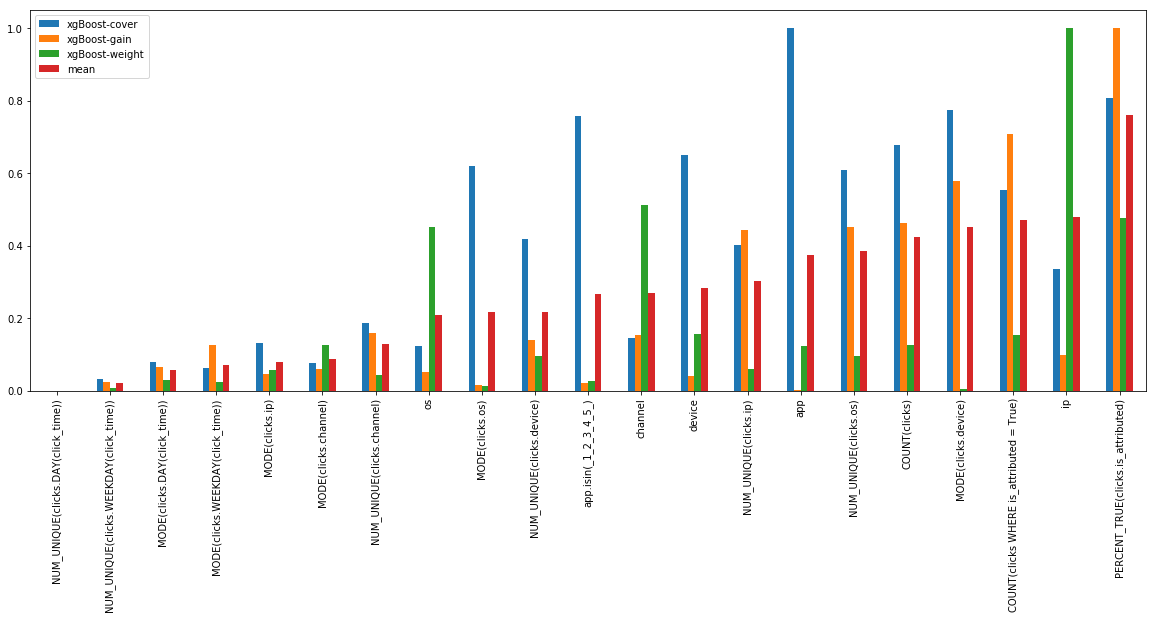

In [27]:
importance_df.sort_values('mean').plot(kind='bar', figsize=(20, 7))